In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Zad 1
plant1_dt = pd.read_csv("Plant_1_Generation_Data.csv")
plant2_dt = pd.read_csv("Plant_2_Generation_Data.csv")


plant2_dt['DATE_TIME'] = pd.to_datetime(plant2_dt['DATE_TIME'])
plant2_dt['DATE_TIME'] = plant2_dt['DATE_TIME'].dt.strftime('%d-%m-%Y %H:%M')
whole_dataset = pd.concat([plant1_dt, plant2_dt], ignore_index=True)
whole_dataset['DATE_TIME'] = pd.to_datetime(whole_dataset['DATE_TIME'])

In [2]:
# Zad 2
filtered_dataset = whole_dataset.dropna()

In [3]:
filtered_dataset

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
136472,2020-06-17 23:45:00,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
136473,2020-06-17 23:45:00,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
136474,2020-06-17 23:45:00,4136001.0,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0


Text(0, 0.5, 'AC POWER')

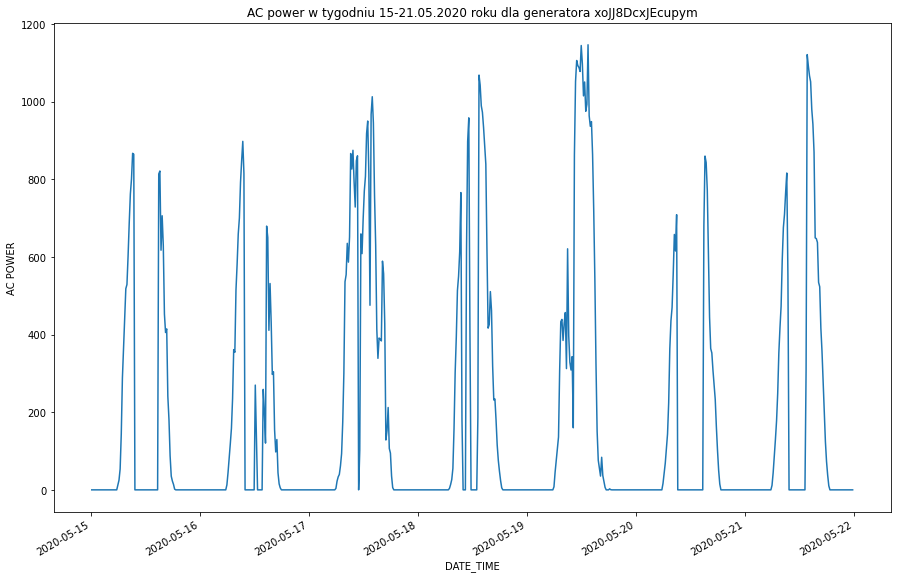

In [4]:
# Zad 3
one_generator_df = filtered_dataset[(filtered_dataset["SOURCE_KEY"] == "xoJJ8DcxJEcupym") 
                                    & (filtered_dataset["DATE_TIME"] > "15-05-2020 00:00")
                                    & (filtered_dataset["DATE_TIME"] <= "21-05-2020 23:59")]
one_generator_df =one_generator_df.set_index("DATE_TIME")
plot = one_generator_df["AC_POWER"].plot( kind="line",
                     title="AC power w tygodniu 15-21.05.2020 roku dla generatora xoJJ8DcxJEcupym", figsize=(15,10))
plot.set_ylabel("AC POWER")
# plot.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
# plt.setp(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
# plt.tight_layout()

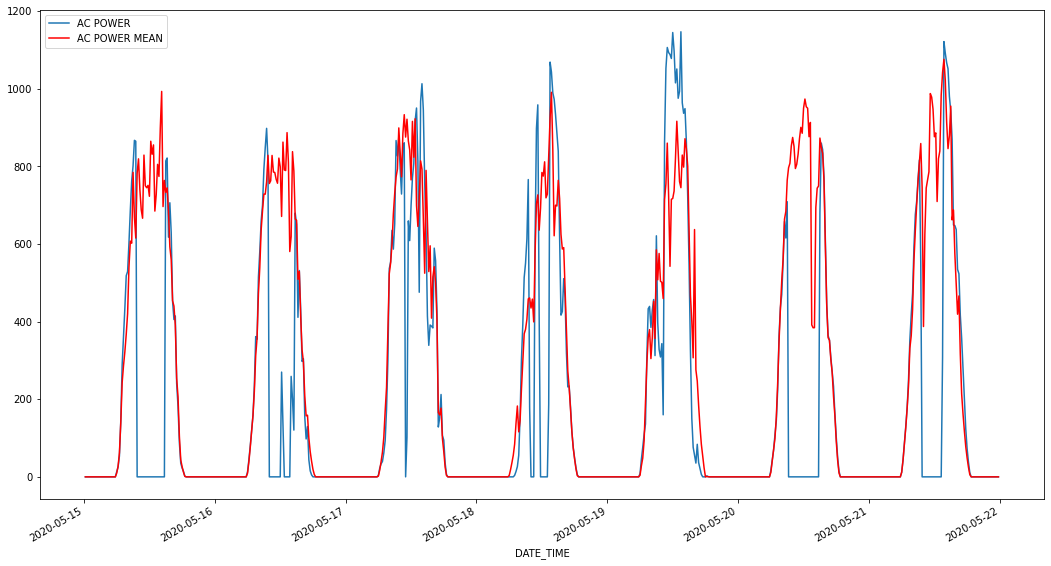

In [5]:
# Zad 4

one_week = filtered_dataset[(filtered_dataset["DATE_TIME"] > "15-05-2020 00:00")
                                    & (filtered_dataset["DATE_TIME"] <= "2020-05-21 23:59")]
grouped_generators_week = one_week.groupby(["DATE_TIME"])["AC_POWER"].mean().to_frame()

plot = one_generator_df["AC_POWER"].plot(figsize=(18,10))
plot = grouped_generators_week["AC_POWER"].plot(color="red")
plot.legend(["AC POWER","AC POWER MEAN"])

In [6]:
filtered_dataset=filtered_dataset.set_index(["DATE_TIME"])
filtered_dataset

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2020-05-15 00:00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
2020-05-15 00:00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
2020-05-15 00:00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...
2020-06-17 23:45:00,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
2020-06-17 23:45:00,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
2020-06-17 23:45:00,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0


In [7]:
# Zad 5
grouped_generators_all = filtered_dataset.groupby(["DATE_TIME"])["AC_POWER"].mean()
grouped_generators_all_df = grouped_generators_all.to_frame()
grouped_generators_all_df.rename(columns = {'AC_POWER':'AC_POWER_MEAN'}, inplace = True)

filtered_dataset2 =filtered_dataset.join(grouped_generators_all_df)
less_than_average = filtered_dataset2[(filtered_dataset2["AC_POWER"] < 0.8 * filtered_dataset2["AC_POWER_MEAN"])]
# tabela z wszystkimi generatorami, których AC POWER wynosił mniej niż 80% średniej z wszystkich generatorów w danym momencie czasowym
less_than_average


,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC_POWER_MEAN
DATE_TIME,,,,,,,
2020-01-06 06:00:00,4136001.0,4UPUqMRk7TRMgml,4.166667,4.020000,0.200000,2.552559e+06,6.019846
2020-01-06 06:00:00,4136001.0,Et9kgGMDl729KT4,4.713333,4.540000,0.333333,1.794867e+06,6.019846
2020-01-06 06:00:00,4136001.0,IQ2d7wF4YD8zU1Q,4.664286,4.514286,0.000000,2.007802e+07,6.019846
2020-01-06 06:00:00,4136001.0,Mx2yZCDsyf6DPfv,2.920000,2.820000,0.000000,2.585583e+06,6.019846
2020-01-06 06:00:00,4136001.0,NgDl19wMapZy17u,2.864286,2.764286,0.000000,1.116447e+08,6.019846
...,...,...,...,...,...,...,...
2020-12-06 18:45:00,4135001.0,uHbuxQJl8lW7ozc,0.000000,0.000000,5888.000000,7.252094e+06,0.951364
2020-12-06 18:45:00,4135001.0,wCURE6d3bPkepu2,0.000000,0.000000,5854.000000,6.993908e+06,0.951364
2020-12-06 18:45:00,4135001.0,z9Y9gH1T5YWrNuG,0.000000,0.000000,5803.000000,7.216867e+06,0.951364


In [8]:
# posortowane generatory według tego ile razy AC_POWER pojedynczego generatora
# było na poziomie < 80% średniej z wszystkich generatorów w danym momencie czasowym
less_than_average.groupby("SOURCE_KEY").size().sort_values( ascending=False)

SOURCE_KEY
Quc1TzYxW2pYoWX    858
Et9kgGMDl729KT4    689
LYwnQax7tkwH5Cb    629
rrq4fwE8jgrTyWY    611
WcxssY2VbP4hApt    548
q49J1IKaHRwDQnt    542
81aHJ1q11NBPMrL    535
PeE6FRyGXUgsRhN    476
xoJJ8DcxJEcupym    476
LlT2YUhhzqhg5Sw    470
9kRcWv60rDACzjR    459
oZZkBaNadn6DNKz    438
V94E5Ben1TlhnDV    419
vOuJvMaM2sgwLmb    403
Qf4GUc1pJu5T6c6    376
oZ35aAeoifZaQzV    373
4UPUqMRk7TRMgml    365
bvBOhCH3iADSZry    365
1BY6WEcLGh8j5v7    351
Mx2yZCDsyf6DPfv    342
NgDl19wMapZy17u    279
mqwcsP2rE7J0TFp    265
ih0vzX44oOqAx2f    257
xMbIugepa2P7lBB    256
z9Y9gH1T5YWrNuG    256
IQ2d7wF4YD8zU1Q    247
zVJPv84UY57bAof    246
wCURE6d3bPkepu2    245
rGa61gmuvPhdLxV    245
YxYtjZvoooNbGkE    244
sjndEbLyjtCKgGv    243
ZoEaEvLYb1n2sOq    243
pkci93gMrogZuBj    241
zBIq5rxdHJRwDNY    240
WRmjgnKYAwPKWDb    240
7JYdWkrLSPkdwr4    236
iCRJl6heRkivqQ3    236
uHbuxQJl8lW7ozc    230
ZnxXDlPa8U1GXgE    229
3PZuoBAID5Wc2HD    223
McdE0feGgRqW7Ca    221
VHMLBKoKgIrUVDU    219
1IF53ai7Xc0U56Y    219
